In [ ]:
How to add minor and other notes to music21 chords? Does not function atm

In [172]:
But quite fun :)))

SyntaxError: unmatched ')' (2099670910.py, line 1)

In [2]:
#!pip install music21
#!pip install pygame

In [93]:
from music21 import *
from music21.midi.realtime import StreamPlayer
import numpy as np
import music21
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
import numpy as np
import random

# Random Jazz Chords

In [13]:
def random_jazz_chord():
    root = random.choice(["C", "D", "E", "F", "G", "A", "B"])
    quality = random.choice(["maj7", "min7", "dom7", "m7b5", "dim7", "aug7"])
    inversion = random.choice([0, 1, 2, 3])
    return harmony.ChordSymbol(f"{root}{quality}")

In [14]:
random_jazz_chord()

<music21.harmony.ChordSymbol Faug7>

In [46]:
num_chords = 10

In [47]:
jazz_chords = [random_jazz_chord() for _ in range(num_chords)]

In [48]:
for i in jazz_chords:
    i.writeAsChord = True

In [49]:
jazz_chords

[<music21.harmony.ChordSymbol Fmaj7: F A C E>,
 <music21.harmony.ChordSymbol Daug7: D F# A# C>,
 <music21.harmony.ChordSymbol Adom7: A C# E G>,
 <music21.harmony.ChordSymbol Amin7: A C E G>,
 <music21.harmony.ChordSymbol Amin7: A C E G>,
 <music21.harmony.ChordSymbol Adim7: A C E- G->,
 <music21.harmony.ChordSymbol Gdom7: G B D F>,
 <music21.harmony.ChordSymbol Cmaj7: C E G B>,
 <music21.harmony.ChordSymbol Cmin7: C E- G B->,
 <music21.harmony.ChordSymbol Emin7: E G B D>]

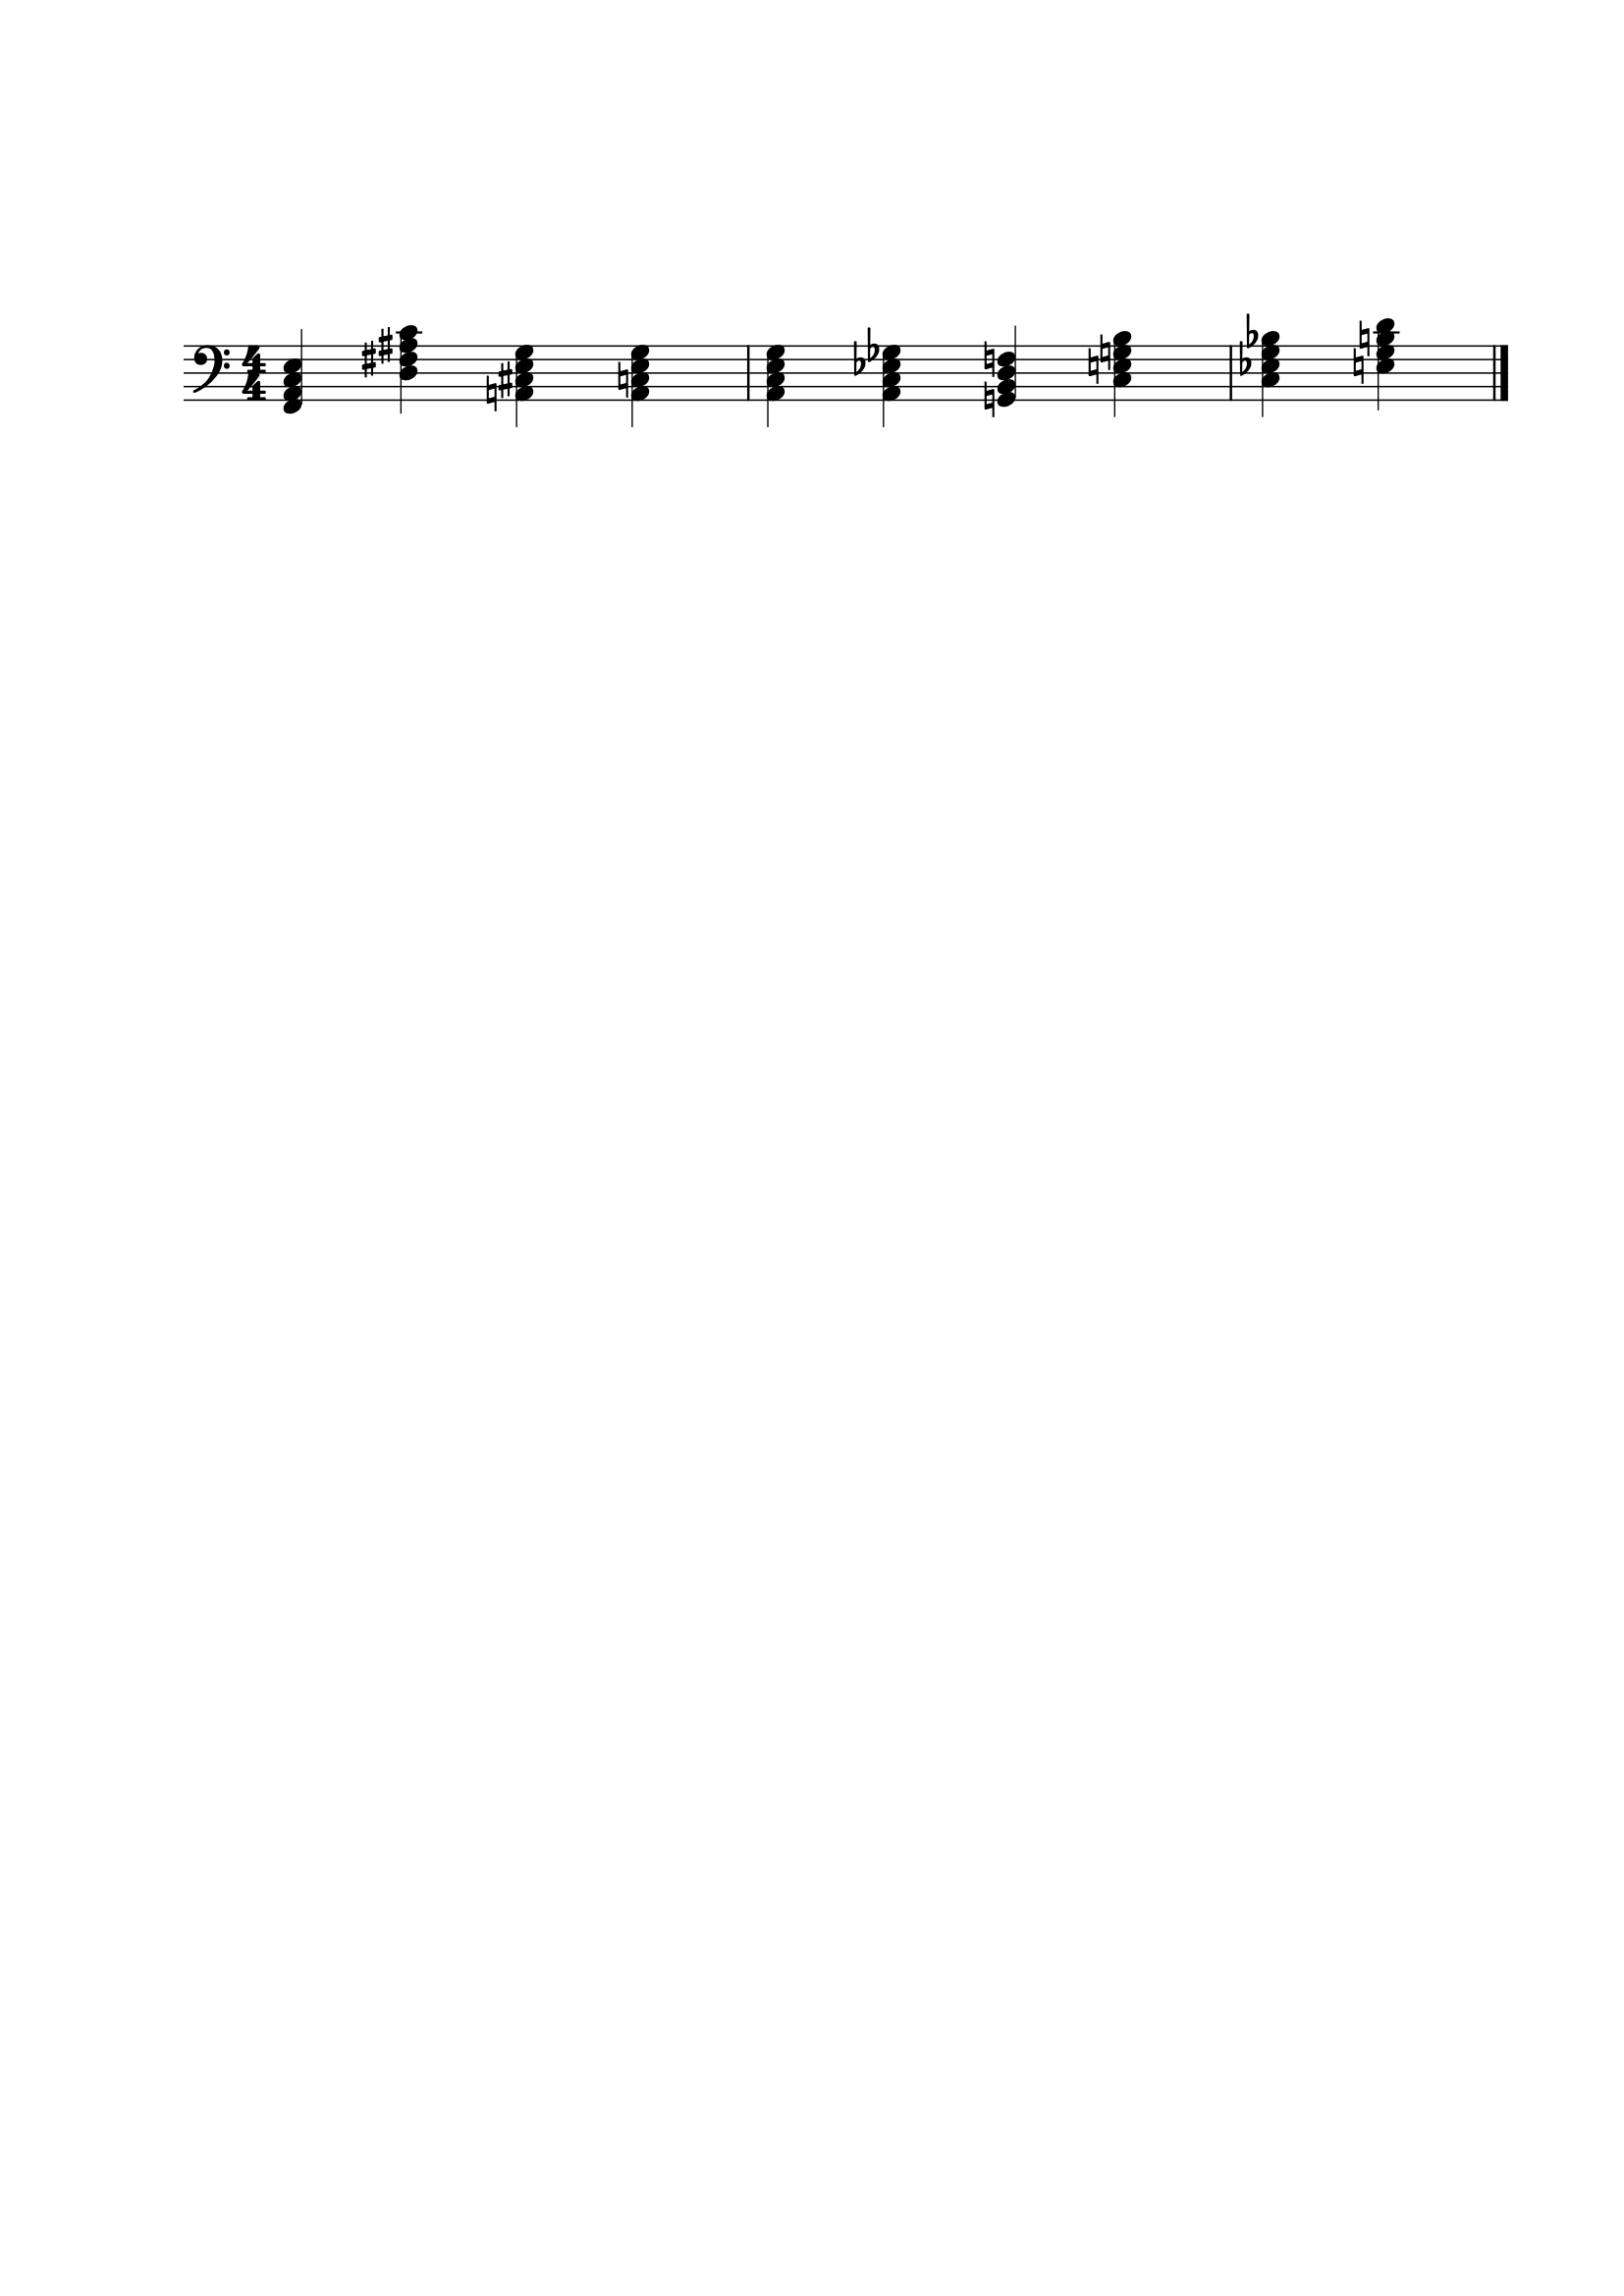

In [95]:
stream1 = stream.Stream()
stream1.append(jazz_chords)
stream1.show()
stream1.show("midi")

In [56]:
# yay ! this plays the chords
StreamPlayer(stream1).play()

# Circle of Fifth

In [76]:
# Define a function to plot the circle of fifths
def plot_circle_of_fifths():
    circle_keys = ["C", "G", "D", "A", "E", "B", "F#", "Db", "Ab", "Eb", "Bb", "F"]
    circle_minor_keys = [key.Key(k).relative.name for k in circle_keys]
    
    # Define the angular position of each key
    angles = np.linspace(0, 2 * np.pi, len(circle_keys) + 1)[:-1]
    
    # Create a polar plot
    fig, ax = plt.subplots(subplot_kw={"polar": True})
    
    # Major keys
    for i, (angle, key_name) in enumerate(zip(angles, circle_keys)):
        ax.text(angle, 1.3, key_name, fontsize=20, ha="center", va="center")
        
    # Minor keys
    for i, (angle, key_name) in enumerate(zip(angles, circle_minor_keys)):
        ax.text(angle, 0.85, key_name.lower(), fontsize=12, ha="center", va="center")
    
    # Set the radius and background color
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_rticks([])
    ax.set_rlim(0, 1.5)
    ax.set_facecolor("lavender")
    plt.title("Circle of Fifths, Major Keys on the outside", y=1.1)
    plt.show()

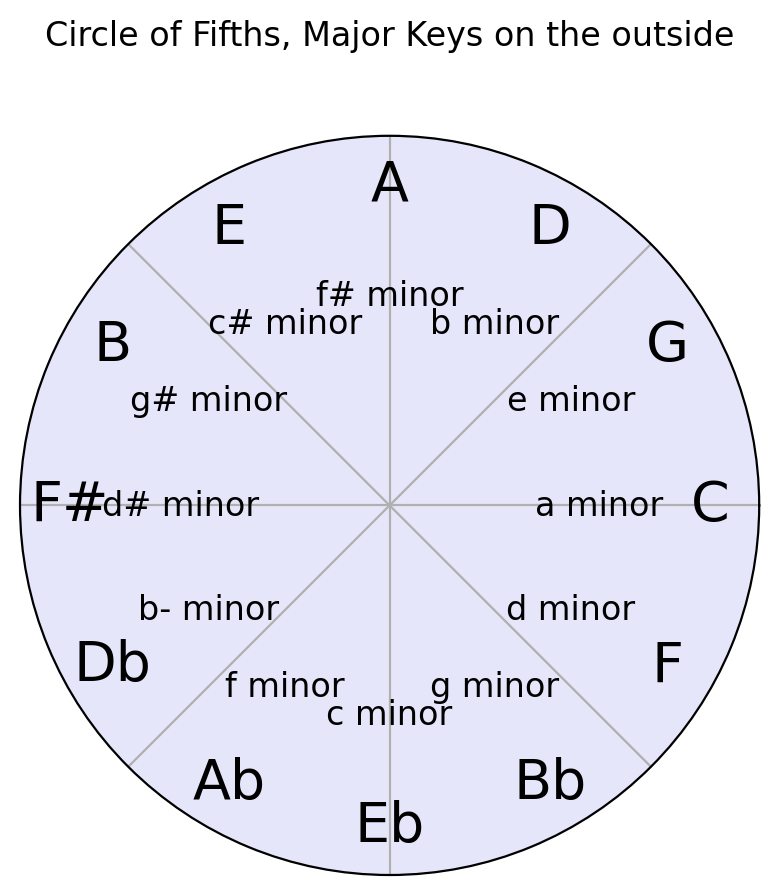

In [77]:
# Call the function to plot the circle of fifths
plot_circle_of_fifths()

In [91]:

# Function to extract chords from a music21 stream
def extract_chords(music_stream):
    return [c for c in music_stream.recurse().getElementsByClass('Chord')]

# Function to plot chords on a polar graph
def plot_chords_polar(chords, index):
    if not chords:
        print("No chords found.")
        return

    if index < 0 or index >= len(chords):
        print("Invalid index.")
        return

    chord = chords[index]

    # Convert pitches to pitch classes
    pitch_classes = [p.pitchClass for p in chord.pitches]

    # Prepare the polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Set the direction of the polar plot
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location("N")

    # Set the range of the polar plot
    ax.set_rlim([0, 12])
    ax.set_rticks([])

    # Plot the chord
    ax.scatter([np.deg2rad(p * 30) for p in pitch_classes], [p for p in pitch_classes], s=100)

    # Add labels to the plot
    for i, p in enumerate(pitch_classes):
        ax.annotate(music21.pitch.Pitch(p).nameWithOctave,
                    xy=(np.deg2rad(p * 30), p),
                    xytext=(np.deg2rad(p * 30), p + 1),
                    fontsize=12,
                    horizontalalignment='center')

    plt.title(f"Chord {index + 1}: {chord.commonName}")
    plt.show()

# Load a music file and extract chords
#filename = 'path/to/your/music/file.mid'
#music_stream = music21.converter.parse(filename)
chords = extract_chords(stream1)

# Display the interactive widget
interact(plot_chords_polar, chords=fixed(chords), index=(0, len(chords) - 1))


interactive(children=(IntSlider(value=4, description='index', max=9), Output()), _dom_classes=('widget-interac…

<function __main__.plot_chords_polar(chords, index)>

# Chord resolution exploration

## Useful python functions

In [155]:
def show_score(score, title = None):
    if title:
        score.metadata = music21.metadata.Metadata()
        score.metadata.title = title
    score.show('text')
    score.show('midi')
    #score.show()

In [170]:
def create_progression_chords(chord_progression):
    l=[]
    for chord in chord_progression:
        #chord.Chord works for midi numbers!
        l.append(music21.chord.Chord(chord, quarterLength=1, ))
    return l

In [147]:
def create_progression_score(progression, title):
    score = music21.stream.Score()
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score, title)

## Voice leading

In [148]:
# Voice leading
def voice_leading():
    score = music21.stream.Score()
    progression = ['C7', 'F']
    chords = music21.stream.Stream()
    for p in progression:
        chords.append(music21.chord.Chord(p, quarterLength=4))
    score.append(chords)
    show_score(score)

voice_leading()

{0.0} <music21.stream.Stream 0x136c4c700>
    {0.0} <music21.chord.Chord C7>
    {4.0} <music21.chord.Chord F>


## Tritone resolution:

In [149]:
def tritone_resolution():
    score = music21.stream.Score()
    progression = ['G7', 'C']
    chords = music21.stream.Stream()
    for p in progression:
        chords.append(music21.chord.Chord(p, quarterLength=4))
    score.append(chords)
    show_score(score)

tritone_resolution()

{0.0} <music21.stream.Stream 0x136ace500>
    {0.0} <music21.chord.Chord G7>
    {4.0} <music21.chord.Chord C>


## Enclosure or surrounding:

In [150]:
def enclosure():
    score = music21.stream.Score()
    melody = music21.stream.Part()
    melody.append(music21.note.Note('D4', quarterLength=1))
    melody.append(music21.note.Note('B3', quarterLength=1))
    melody.append(music21.note.Note('C4', quarterLength=2))
    score.append(melody)

    progression = ['C']
    chords = music21.stream.Part()
    for p in progression:
        chords.append(music21.chord.Chord(p, quarterLength=4))
    score.append(chords)
    show_score(score)

enclosure()

{0.0} <music21.stream.Part 0x136b8ac50>
    {0.0} <music21.note.Note D>
    {1.0} <music21.note.Note B>
    {2.0} <music21.note.Note C>
{4.0} <music21.stream.Part 0x136ce4610>
    {0.0} <music21.chord.Chord C>


In [151]:
## Chromatic approach

In [152]:
def chromatic_approach():
    score = music21.stream.Score()
    melody = music21.stream.Part()
    melody.append(music21.note.Note('B3', quarterLength=1))
    melody.append(music21.note.Note('C4', quarterLength=3))
    score.append(melody)

    progression = ['C']
    chords = music21.stream.Part()
    for p in progression:
        chords.append(music21.chord.Chord(p, quarterLength=4))
    score.append(chords)
    show_score(score)

chromatic_approach()

{0.0} <music21.stream.Part 0x136ce5d20>
    {0.0} <music21.note.Note B>
    {1.0} <music21.note.Note C>
{4.0} <music21.stream.Part 0x136ce5e70>
    {0.0} <music21.chord.Chord C>


In [153]:
## Delayed resolution

In [164]:
def delayed_resolution():
    score = music21.stream.Score()
    melody = music21.stream.Part()
    melody.append(music21.note.Note('G4', quarterLength=2))
    melody.append(music21.note.Note('A4', quarterLength=1))
    melody.append(music21.note.Note('G4', quarterLength=1))
    score.append(melody)

    progression = ['C', 'G']
    chords = music21.stream.Part()
    for p in progression:
        chords.append(music21.chord.Chord(p, quarterLength=2))
    score.append(chords)
    show_score(score)

delayed_resolution()

{0.0} <music21.stream.Part 0x136ce5ed0>
    {0.0} <music21.note.Note G>
    {2.0} <music21.note.Note A>
    {3.0} <music21.note.Note G>
{4.0} <music21.stream.Part 0x136acd9c0>
    {0.0} <music21.chord.Chord C>
    {2.0} <music21.chord.Chord G>


# Human Feelings and chord progressions

## Happiness

In [165]:
def happiness():
    score = music21.stream.Score()
    progression = ['C', 'G', 'A-','F']
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score)

happiness()

{0.0} <music21.stream.Stream 0x136ce7910>
    {0.0} <music21.chord.Chord C>
    {1.0} <music21.chord.Chord G>
    {2.0} <music21.chord.Chord A->
    {3.0} <music21.chord.Chord F>


## Sadness

In [166]:
def sadness():
    score = music21.stream.Score()
    progression = ['A-', 'F', 'C', 'G']
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score)

sadness()

{0.0} <music21.stream.Stream 0x136c4dde0>
    {0.0} <music21.chord.Chord A->
    {1.0} <music21.chord.Chord F>
    {2.0} <music21.chord.Chord C>
    {3.0} <music21.chord.Chord G>


## Melancholy

In [126]:
def melancholy():
    score = music21.stream.Score()
    progression = ['C', 'G', 'A-', 'F7']
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score)

melancholy()

{0.0} <music21.stream.Stream 0x136a63340>
    {0.0} <music21.chord.Chord C>
    {4.0} <music21.chord.Chord G>
    {8.0} <music21.chord.Chord A->
    {12.0} <music21.chord.Chord F7>


## Nostalgia

In [158]:
def nostalgia():
    score = music21.stream.Score()
    progression = ['C', 'E7', 'F', 'G']
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score)

nostalgia()

{0.0} <music21.stream.Stream 0x136b8a800>
    {0.0} <music21.chord.Chord C>
    {1.0} <music21.chord.Chord E7>
    {2.0} <music21.chord.Chord F>
    {3.0} <music21.chord.Chord G>


## Tension or suspense

In [128]:
# Tension or suspense
def tension_suspense():
    score = music21.stream.Score()
    progression = ['C', 'F', 'G7', 'Bm']
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score)

tension_suspense()

{0.0} <music21.stream.Stream 0x1336e8c70>
    {0.0} <music21.chord.Chord C>
    {4.0} <music21.chord.Chord F>
    {8.0} <music21.chord.Chord G7>
    {12.0} <music21.chord.Chord B->


## Mystery

In [129]:
def mystery():
    score = music21.stream.Score()
    progression = ['D-', 'G', 'A-']
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score)

mystery()

{0.0} <music21.stream.Stream 0x136a846a0>
    {0.0} <music21.chord.Chord D->
    {4.0} <music21.chord.Chord G>
    {8.0} <music21.chord.Chord A->


## Romantic

In [169]:
# Romantic
def romantic():
    score = music21.stream.Score()
    progression = ['C', 'D-', 'G7', 'C7']
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score)

romantic()

AttributeError: module 'music21.chord' has no attribute 'PercussionChord'

## Uplifting or triumphant

In [161]:
def uplifting_triumphant():
    score = music21.stream.Score()
    progression = ['C', 'E-', 'F', 'G']
    chords = music21.stream.Stream(create_progression_chords(progression))
    score.append(chords)
    show_score(score)

uplifting_triumphant()

{0.0} <music21.stream.Stream 0x136ce42b0>
    {0.0} <music21.chord.Chord C>
    {1.0} <music21.chord.Chord E->
    {2.0} <music21.chord.Chord F>
    {3.0} <music21.chord.Chord G>


# Other examples 

In [167]:
# Happiness
create_progression_score(['C', 'G', 'Am', 'F'], "Happiness 1: I - V - vi - IV")
create_progression_score(['C', 'F', 'G', 'C'], "Happiness 2: I - IV - V - I")

AccidentalException: m is not a supported accidental type

In [171]:
# Sadness
create_progression_score(['Am', 'F', 'C', 'G'], "Sadness 1: vi - IV - I - V")
create_progression_score(['Cm', 'G', 'Cm'], "Sadness 2: i - V - i")

AccidentalException: m is not a supported accidental type

In [143]:
# Melancholy
create_progression_score(['C', 'G', 'A-', 'Fmaj7'], "Melancholy 1: I - V - vi - IVmaj7")
create_progression_score(['C', 'A-', 'F', 'G'], "Melancholy 2: I - vi - IV - V")

AccidentalException: maj is not a supported accidental type

In [ ]:
# Nostalgia
create_progression_score(['C', 'E7', 'F', 'G'], "Nostalgia 1: I - III7 - IV - V")
create_progression_score(['C', 'A7', 'D-', 'G'], "Nostalgia 2: I - VI7 - ii - V")

In [ ]:
# Tension or suspense
create_progression_score(['C', 'F', 'G7', 'Bdim'], "Tension 1: I - IV - V7 - vii°")
create_progression_score(['C', 'G', 'Bb', 'F'], "Tension 2: I - V - bVII - IV")

In [ ]:
# Mystery
create_progression_score(['Dm', 'G', 'Am'], "Mystery 1: Dorian mode - i - IV - v")
create_progression_score(['C', 'F', 'C', 'Db'], "Mystery 2: I - IV - I - bII")

In [ ]:
# Romantic
create_progression_score(['C', 'Dm7', 'G7', 'Cmaj7'], "Romantic 1: I - ii7 - V7 - Imaj7")
create_progression_score(['C', 'Am7', 'Dm7', 'G7'], "Romantic 2: I - vi7 - ii7 - V7")

In [ ]:
# Uplifting or triumphant
create_progression_score(['C', 'A', 'Dm', 'G', 'C'], "Triumphant 1: I - VI - ii - V - I")
create_progression_score(['C', 'Em', 'F', 'G'], "Triumphant 2: I - iii - IV - V")